In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix

plt.style.use('seaborn-colorblind')

In [2]:
train = pd.read_csv("train.csv")
train.drop('Unnamed: 0', axis=1, inplace=True)

test = pd.read_csv("test.csv")

In [3]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [4]:
train = train[['NU_INSCRICAO','IN_TREINEIRO','CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]

In [5]:
train.head()

,NU_INSCRICAO,IN_TREINEIRO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,0,43,RS,24,M,1,1,1,4,...,80.0,520.0,D,D,C,A,A,C,H,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,0,23,CE,17,F,3,1,2,0,...,80.0,580.0,A,A,B,A,A,A,NaN,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,0,23,CE,21,F,3,1,3,0,...,NaN,NaN,D,D,C,A,A,A,NaN,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,0,33,RJ,25,F,0,1,1,9,...,NaN,NaN,H,E,E,C,B,C,F,D
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,0,13,AM,28,M,2,1,1,4,...,NaN,NaN,E,D,C,A,A,B,F,A


In [6]:
train.isna().sum().sort_values(ascending=False).head(14)

TP_DEPENDENCIA_ADM_ESC    9448
TP_ENSINO                 9448
Q027                      7373
NU_NOTA_COMP1             3597
NU_NOTA_COMP5             3597
TP_STATUS_REDACAO         3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_REDACAO           3597
NU_NOTA_LC                3597
NU_NOTA_CH                3389
NU_NOTA_CN                3389
TP_ANO_CONCLUIU              0
dtype: int64

## Conhecendo o `IN_TREINEIRO`

In [7]:
train.IN_TREINEIRO.value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [8]:
(train.corr(method='spearman')['IN_TREINEIRO'] < -0.5).sort_values(ascending=False).head(5)

NU_IDADE             True
NU_NOTA_REDACAO     False
IN_SABATISTA        False
CO_UF_RESIDENCIA    False
TP_COR_RACA         False
Name: IN_TREINEIRO, dtype: bool

In [9]:
(train.corr(method='spearman')['IN_TREINEIRO'] > 0.5).sort_values(ascending=False).head(5)

IN_TREINEIRO         True
TP_ST_CONCLUSAO      True
IN_SABATISTA        False
CO_UF_RESIDENCIA    False
NU_IDADE            False
Name: IN_TREINEIRO, dtype: bool

Obviamente a variável com mais correlação com a variável treineiro é a de situação de conclusão do EM. O valor 3 são de alunos que ainda não concluiram o EM.

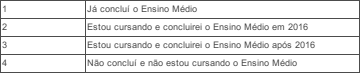

A segunda variável, também sem surpresas, é a idade

In [10]:
train.TP_ST_CONCLUSAO.value_counts()

1    6524
2    4283
3    2306
4     617
Name: TP_ST_CONCLUSAO, dtype: int64

In [11]:
train.groupby('TP_ST_CONCLUSAO')['IN_TREINEIRO'].sum()

TP_ST_CONCLUSAO
1       0
2       0
3    1783
4       0
Name: IN_TREINEIRO, dtype: int64

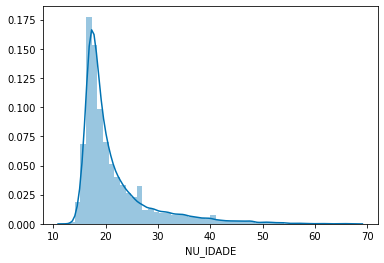

In [12]:
sns.distplot(train.NU_IDADE)

(0.0, 40.0)

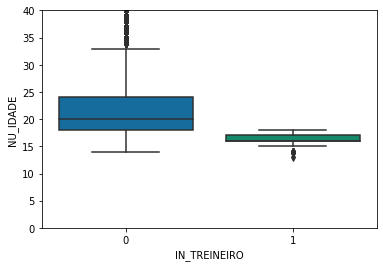

In [13]:
sns.boxplot(train.IN_TREINEIRO, train.NU_IDADE)
plt.ylim(0,40)

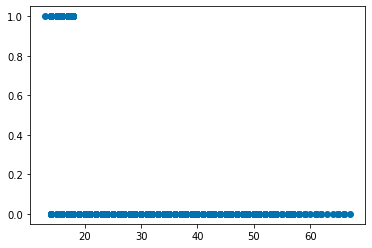

In [14]:
plt.scatter(train.NU_IDADE, train.IN_TREINEIRO);

#### AS VARIÁVEIS

In [15]:
train['idade_scaled'] = (train['NU_IDADE'] - train['NU_IDADE'].mean())/ train['NU_IDADE'].std()
test['idade_scaled'] = (test['NU_IDADE'] - test['NU_IDADE'].mean())/ test['NU_IDADE'].std()

In [16]:
bl_x = train[['idade_scaled','TP_ST_CONCLUSAO']]
bl_y = train.IN_TREINEIRO

#para testar o modelo:
X_train, X_val, y_train, y_val = train_test_split(bl_x, bl_y, test_size=0.25, random_state=42)

# para fazer a previsão:
X_test = test[['idade_scaled','TP_ST_CONCLUSAO']]

## Random Forest Regressor

In [17]:
#testando o modelo
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

mae=metrics.mean_absolute_error(y_val, y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_val, y_pred))

print(mae,rmse)

0.004592845815961017 0.04897190611599989


In [18]:
#fazendo a previsão
y_pred = rf.predict(X_test)

answer = pd.DataFrame({'NU_INSCRICAO':test.NU_INSCRICAO,
                        'IN_TREINEIRO':y_pred})
answer.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0.0
1,177f281c68fa032aedbd842a745da68490926cd2,0.0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1.0
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0.0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0.0


In [19]:
answer.to_csv('answer.csv', index=False)

Codenation: 98.4683%

## Regressão Logística

![confusionmatrix.png](confusionmatrix.png)

Por exemplo, _precision_ (em vermelho) é definida como:

$$\text{precision} = \frac{TP}{TP + FP}$$

O _fall-out_ (em amarelo) é definido como:

$$\text{fall-out} = \frac{FP}{FP + TN}$$

O _recall_ (em azul) é definido como:

$$\text{recall} = \frac{TP}{TP + FN}$$

Note que existem certas relações entre as métricas, por exemplo:

$$\text{fall-out} + \text{specificity} = \frac{FP}{FP + TN} + \frac{TN}{TN + FP} = \frac{FP + TN}{FP + TN} = 1 \Rightarrow \text{fall-out} = 1 - \text{specificity}$$

Outras métricas importantes também podem ser derivadas:

$$\text{accuracy} = \frac{TP + TN}{P + N}$$

onde $P$ são os realmente positivos (_actual positive_) e $N$ são os realmente negativos (_actual negative_).

O $F_{1}$-_score_ é a média harmônica entre _precision_ e _recall_:

$$F_{1} = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$$

Accuracy: 0.9895135450043694
Precision: 0.9433551198257081
Recall: 0.9774266365688488


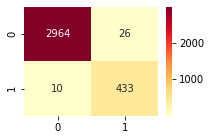

In [20]:
#testando o modelo
lg = LogisticRegression()

lg.fit(X_train, y_train)
y_pred = lg.predict(X_val)

plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_val, y_pred),annot=True, cmap="YlOrRd" ,fmt='g')

print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))

Well, you got a classification rate of 98,5%, considered as good accuracy.

Precision: when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted the student is `treineiro`, the student really is 94,3% of the time.

Recall: there are students that are `treineiros` in the test set and your Logistic Regression model can identify it 97,7% of the time.

In [21]:
#fazendo a previsão
y_pred = lg.predict(X_test)

answer = pd.DataFrame({'NU_INSCRICAO':test.NU_INSCRICAO,
                       'IN_TREINEIRO':y_pred})
answer.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [22]:
answer.to_csv('answer.csv', index=False)

Codenation: 99.0371%

## Random Forest Classifier

Accuracy: 0.997087095834547
Precision: 1.0
Recall: 0.9774266365688488


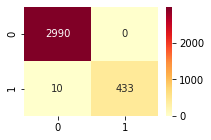

In [23]:
#testando o modelo
rf = RandomForestClassifier()
rf_fitted = rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_val, y_pred),annot=True, cmap="YlOrRd" ,fmt='g')

print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))

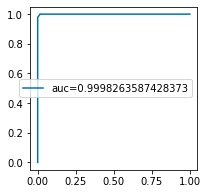

In [24]:
plt.figure(figsize=(3,3))
y_pred_proba = rf.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc='best')
plt.show()

In [26]:
metrics.roc_auc_score(y_val, y_pred_proba)

0.9998263587428373

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

In [27]:
#fazendo a previsão
y_pred = rf.predict(X_test)

answer = pd.DataFrame({'NU_INSCRICAO':test.NU_INSCRICAO,
                        'IN_TREINEIRO':y_pred})
answer.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [28]:
answer.to_csv('answer.csv', index=False)

Codenation: 99.7374%